# Module 6: Modèles Graphiques et Séries Temporelles

## 6.1 Modèles Graphiques Probabilistes

### Réseaux bayésiens

Les réseaux bayésiens (ou réseaux de Bayes) sont des modèles graphiques probabilistes qui représentent les dépendances conditionnelles entre un ensemble de variables aléatoires à travers un graphe acyclique orienté (DAG). Chaque nœud du graphe représente une variable aléatoire, et chaque arête représente une dépendance directe entre les variables.

Les réseaux bayésiens sont utilisés pour l'inférence probabiliste, la prédiction, et la découverte de connaissances.

### Inférence et apprentissage

*   **Inférence :** L'inférence dans un réseau bayésien consiste à calculer la probabilité d'une ou plusieurs variables étant donné les valeurs observées d'autres variables. Il existe plusieurs algorithmes d'inférence, tels que l'inférence exacte (par exemple, l'algorithme de variable d'élimination) et l'inférence approximative (par exemple, la simulation de Monte Carlo).
*   **Apprentissage :** L'apprentissage d'un réseau bayésien consiste à estimer les paramètres du modèle (c'est-à-dire les probabilités conditionnelles) à partir de données. Il existe deux types d'apprentissage : l'apprentissage paramétrique (lorsque la structure du graphe est connue) et l'apprentissage structurel (lorsque la structure du graphe est inconnue).

Voici un exemple en Python utilisant la librairie `pgmpy` :

In [9]:
! pip install statsmodels hmmlearn pgmpy

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------------- -------------------- 4.7/9.6 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 28.0 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 23.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 29.4 MB/s  0:00:00
   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   ---------------------------------------- 756.0/756.0 kB 8.2 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyro-api]
   ----- ---------------------------------- 1/7 [patsy]
   ----- ---------------------------------- 1/7 [patsy]
   ----- ---------------------------------- 1/7 [patsy]
   ----- ---------------------------------- 1/7 [patsy]
   ----------- ---------------------------- 2/7 [opt-einsum]
   ----------- ---------------------------- 2/7 [opt-einsum]
   ---

In [10]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\graphical_models_time_series.ipynb
from pgmpy.models import BayesianNetwork 
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Définir la structure du réseau
model = BayesianNetwork([('C', 'S'), ('C', 'R'), ('S', 'W'), ('R', 'W')])

# Définir les probabilités conditionnelles
cpd_c = TabularCPD(variable='C', variable_card=2, values=[[0.5], [0.5]])
cpd_s = TabularCPD(variable='S', variable_card=2, values=[[0.5, 0.9], [0.5, 0.1]], evidence=['C'], evidence_card=[2])
cpd_r = TabularCPD(variable='R', variable_card=2, values=[[0.8, 0.2], [0.2, 0.8]], evidence=['C'], evidence_card=[2])
cpd_w = TabularCPD(variable='W', variable_card=2, values=[[1.0, 0.1, 0.1, 0.01], [0.0, 0.9, 0.9, 0.99]], evidence=['S', 'R'], evidence_card=[2, 2])

# Ajouter les CPD au modèle
model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w)

# Vérifier le modèle
model.check_model()

# Faire de l'inférence
inference = VariableElimination(model)
result = inference.query(variables=['W'], evidence={'C': 1})
print(result)

c:\Users\michel.bertrand.mama\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: BayesianNetwork has been deprecated. Please use DiscreteBayesianNetwork instead.

### Chaînes de Markov

Une chaîne de Markov est un modèle stochastique qui décrit une séquence d'événements possibles dans laquelle la probabilité de chaque événement dépend uniquement de l'état précédent (propriété de Markov).

Une chaîne de Markov est définie par :

*   Un ensemble d'états possibles.
*   Une matrice de transition qui spécifie la probabilité de passer d'un état à un autre.

### Propriété de Markov

La propriété de Markov stipule que l'état futur d'un système ne dépend que de son état actuel, et non de son passé. En d'autres termes, si l'état actuel est connu, alors le passé est sans importance pour prédire l'avenir.

Cette propriété simplifie considérablement la modélisation des systèmes dynamiques, car elle permet de se concentrer uniquement sur l'état actuel.

### Modèles de Markov cachés

Un modèle de Markov caché (HMM) est une extension d'une chaîne de Markov dans laquelle les états ne sont pas directement observables, mais sont inférés à partir d'observations. Un HMM est défini par :

*   Un ensemble d'états cachés.
*   Un ensemble d'observations possibles.
*   Une matrice de transition qui spécifie la probabilité de passer d'un état caché à un autre.
*   Une matrice d'émission qui spécifie la probabilité d'émettre une observation donnée étant donné un état caché.

Les HMM sont utilisés pour la reconnaissance vocale, la bioinformatique, et la modélisation de séries temporelles.

Voici un exemple en Python utilisant la librairie `hmmlearn` :

In [11]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\graphical_models_time_series.ipynb
from hmmlearn import hmm
import numpy as np

# Définir le modèle HMM
model = hmm.GaussianHMM(n_components=3, covariance_type="full")

# Définir les paramètres du modèle
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))

# Générer des données d'exemple
X, Z = model.sample(n_samples=100)

# Entraîner le modèle
model.fit(X)

# Faire des prédictions
Z_pred = model.predict(X)

print("Séquence d'états prédite:", Z_pred) 

Séquence d'états prédite: [1 0 2 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 2 2 1 2 1 1 1 2 2 1 2 1 2 1 1 1 1 0
 0 2 0 0 0 2 2 0 2 1 2 1 2 2 2 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1
 2 1 0 2 1 0 0 2 2 0 0 1 1 0 2 2 2 2 2 1 1 1 2 0 0 2]


## 6.2 Séries Temporelles

### Modèles ARIMA

Les modèles ARIMA (Autoregressive Integrated Moving Average) sont une classe de modèles statistiques utilisés pour analyser et prédire les séries temporelles. Un modèle ARIMA est défini par trois paramètres :

*   **p :** L'ordre de la partie autorégressive (AR).
*   **d :** L'ordre de la partie intégrée (I).
*   **q :** L'ordre de la partie moyenne mobile (MA).

Un modèle ARIMA(p, d, q) combine les composantes autorégressive, intégrée et moyenne mobile pour modéliser les dépendances dans la série temporelle.

### Stationnarité

La stationnarité est une propriété importante des séries temporelles. Une série temporelle est dite stationnaire si ses propriétés statistiques (moyenne, variance, autocorrélation) ne varient pas avec le temps.

De nombreux modèles de séries temporelles, tels que les modèles ARIMA, supposent que la série temporelle est stationnaire. Si une série temporelle n'est pas stationnaire, elle doit être transformée en une série stationnaire avant d'être modélisée (par exemple, en prenant la différence).

### Autocorrélation

L'autocorrélation est la corrélation d'une série temporelle avec elle-même à différents décalages de temps. Elle mesure la dépendance linéaire entre les valeurs de la série à différents moments.

L'autocorrélation est utilisée pour identifier les motifs et les dépendances dans les séries temporelles, et pour déterminer l'ordre des modèles ARIMA.

### Lissage exponentiel

Le lissage exponentiel est une méthode de prévision de séries temporelles qui utilise une moyenne pondérée des observations passées, où les poids diminuent exponentiellement avec l'âge des observations. Il existe plusieurs types de lissage exponentiel, tels que le lissage exponentiel simple, le lissage exponentiel double, et le lissage exponentiel triple, qui sont utilisés pour modéliser différents types de tendances et de saisonnalités.

Voici un exemple en Python utilisant la librairie `statsmodels` :

C:\Users\michel.bertrand.mama\AppData\Local\Temp\ipykernel_34692\136506117.py:15: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit2 = Holt(df['Valeurs']).fit(smoothing_level=0.2, smoothing_slope=0.05, optimized=False)


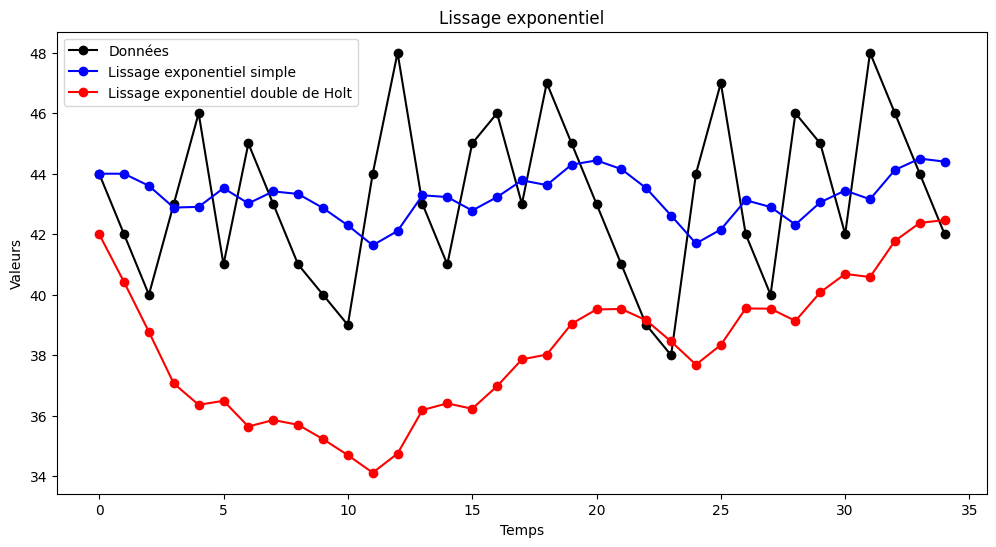

In [12]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\graphical_models_time_series.ipynb
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt

# Générer des données d'exemple
data = [44, 42, 40, 43, 46, 41, 45, 43, 41, 40, 39, 44, 48, 43, 41, 45, 46, 43, 47, 45, 43, 41, 39, 38, 44, 47, 42, 40, 46, 45, 42, 48, 46, 44, 42]
df = pd.DataFrame({'Valeurs': data})

# Lissage exponentiel simple
fit1 = SimpleExpSmoothing(df['Valeurs']).fit(smoothing_level=0.2, optimized=False)
# fit1 = SimpleExpSmoothing(df['Valeurs'], initialization_method="estimated").fit() # Newer versions of statsmodels require initialization_method

# Lissage exponentiel double de Holt
fit2 = Holt(df['Valeurs']).fit(smoothing_level=0.2, smoothing_slope=0.05, optimized=False)
# fit2 = Holt(df['Valeurs'], initialization_method="estimated").fit() # Newer versions of statsmodels require initialization_method

# Afficher les résultats
plt.figure(figsize=(12, 6))
plt.plot(df['Valeurs'], marker='o', color='black', label='Données')
plt.plot(fit1.fittedvalues, marker='o', color='blue', label='Lissage exponentiel simple')
plt.plot(fit2.fittedvalues, marker='o', color='red', label='Lissage exponentiel double de Holt')
plt.xlabel('Temps')
plt.ylabel('Valeurs')
plt.title('Lissage exponentiel')
plt.legend()
plt.show()